In [3]:
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error
import gc
import os
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection, preprocessing, metrics
import lightgbm as lgb


In [113]:
data=pd.read_csv('C:/Users/Srishti/Desktop/dsf/assignment3/all/train.csv',dtype={'fullVisitorId': 'str'})

In [5]:
data.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [7]:
missing_values=data.isnull().sum()
print(missing_values)

channelGrouping         0
date                    0
device                  0
fullVisitorId           0
geoNetwork              0
sessionId               0
socialEngagementType    0
totals                  0
trafficSource           0
visitId                 0
visitNumber             0
visitStartTime          0
dtype: int64


In [114]:
#converting from json format
device_json=[]
for i in data['device']:
    device_json.append(json.loads(i))

In [115]:
device_json=json_normalize(device_json)

In [116]:
geoNetwork_json=[]
for i in data['geoNetwork']:
    geoNetwork_json.append(json.loads(i))
geoNetwork_json=json_normalize(geoNetwork_json)


In [12]:
geoNetwork_json.head()

,city,cityId,continent,country,latitude,longitude,metro,networkDomain,networkLocation,region,subContinent
0,Izmir,not available in demo dataset,Asia,Turkey,not available in demo dataset,not available in demo dataset,(not set),ttnet.com.tr,not available in demo dataset,Izmir,Western Asia
1,not available in demo dataset,not available in demo dataset,Oceania,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,Australasia
2,Madrid,not available in demo dataset,Europe,Spain,not available in demo dataset,not available in demo dataset,(not set),unknown.unknown,not available in demo dataset,Community of Madrid,Southern Europe
3,not available in demo dataset,not available in demo dataset,Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,Southeast Asia
4,not available in demo dataset,not available in demo dataset,Europe,United Kingdom,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,Northern Europe


In [117]:
trafficSource_json=[]
for i in data['trafficSource']:
    trafficSource_json.append(json.loads(i))
trafficSource_json=json_normalize(trafficSource_json)

In [14]:
trafficSource_json.head()

,adContent,adwordsClickInfo.adNetworkType,adwordsClickInfo.criteriaParameters,adwordsClickInfo.gclId,adwordsClickInfo.isVideoAd,adwordsClickInfo.page,adwordsClickInfo.slot,campaign,campaignCode,isTrueDirect,keyword,medium,referralPath,source
0,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


In [118]:
totals_json=[]
for i in data['totals']:
    totals_json.append(json.loads(i))
totals_json=json_normalize(totals_json)

In [16]:
totals_json.head()
#totals_json.describe()

,bounces,hits,newVisits,pageviews,transactionRevenue,visits
0,1,1,1,1,NaN,1
1,1,1,1,1,NaN,1
2,1,1,1,1,NaN,1
3,1,1,1,1,NaN,1
4,1,1,NaN,1,NaN,1


In [119]:
final_device=pd.DataFrame(device_json)
final_geo=pd.DataFrame(geoNetwork_json)
final_traffic=pd.DataFrame(trafficSource_json)
final_totals=pd.DataFrame(totals_json)

In [120]:
data1=pd.concat([data,final_device,final_geo,final_totals,final_traffic],axis=1)

In [19]:
data1.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,...,adwordsClickInfo.isVideoAd,adwordsClickInfo.page,adwordsClickInfo.slot,campaign,campaignCode,isTrueDirect,keyword,medium,referralPath,source
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


In [121]:
data1=data1.drop(['device','geoNetwork','trafficSource','totals'],axis=1)

In [122]:
#dropping columns with all nan values and values which arent available in dataset
null_count=((data1[data1.columns] == 'not available in demo dataset') | (data1[data1.columns].isna())).sum()
df_size=len(data1)
keys = null_count.keys()
null_col = [col for col in keys if null_count[str(col)] > 0 if null_count[str(col)] == df_size]



In [123]:
data1.drop(null_col, axis=1, inplace=True) 

In [124]:
data1=data1.drop(['adwordsClickInfo.gclId'],axis=1)


In [27]:
data1.nunique()

channelGrouping                        8
date                                 366
fullVisitorId                     714167
sessionId                         902755
socialEngagementType                   1
visitId                           886303
visitNumber                          384
visitStartTime                    887159
browser                               54
deviceCategory                         3
isMobile                               2
operatingSystem                       20
city                                 649
continent                              6
country                              222
metro                                 94
networkDomain                      28064
region                               376
subContinent                          23
bounces                                1
hits                                 274
newVisits                              1
pageviews                            213
transactionRevenue                  5332
visits          

In [125]:
#replacing nan values of transaction revenue with 0
data1['transactionRevenue'].fillna(0,inplace=True)

In [126]:
#converting into numeric
data1.transactionRevenue = pd.to_numeric(data1.transactionRevenue, errors='coerce')

In [127]:
data1.drop(columns=['campaignCode'], inplace=True)
data1.drop(columns=['socialEngagementType'], inplace=True)

In [31]:
#data1.dtypes

In [128]:
#converting time to datetime object
data1['date'] = pd.to_datetime(data1['date'],format='%Y%m%d')

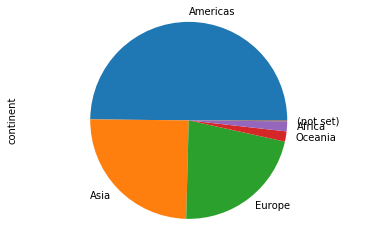

In [40]:
data_pie1 = data1[['continent','transactionRevenue']]
data_pie1 = data_pie1['continent'].value_counts()
data_pie1.plot(kind='pie')
plt.axis('equal')
plt.show()


In [129]:
data1['month'] = data1['date'].apply(lambda x: x.month)
data1['dayy'] = data1['date'].apply(lambda x: x.day)
data1['year'] = data1['date'].apply(lambda x: x.year)

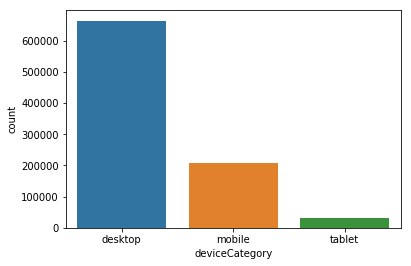

In [42]:
sns.countplot(data1['deviceCategory'])

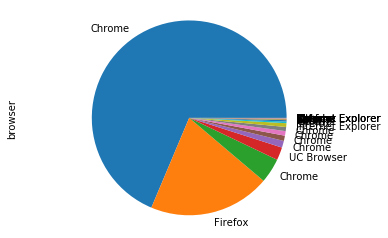

In [43]:
data_pie3 = data1['browser'].value_counts()
labels=data1['browser'].values
data_pie3.plot(kind='pie',labels=labels)
plt.axis('equal')
plt.show()

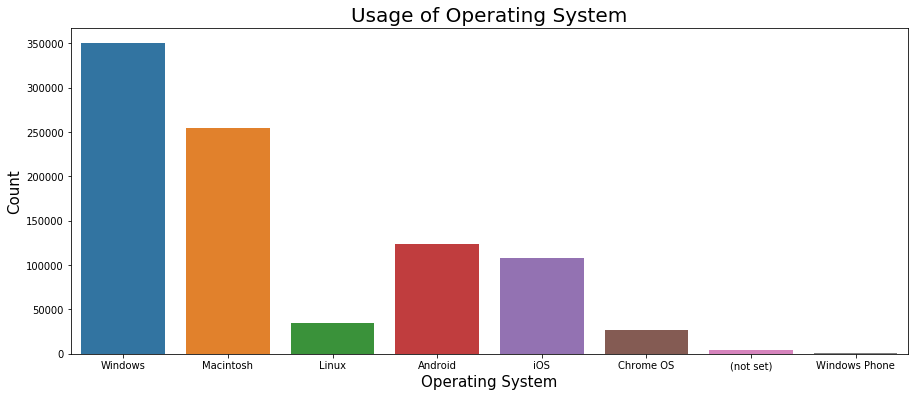

In [44]:
plt.figure(figsize=(15,6))
ax3 = sns.countplot(x='operatingSystem',data = data1[data1['operatingSystem'].isin(data1['operatingSystem'].value_counts()[:8].index)])
ax3.set_title("Usage of Operating System",fontsize=20)
ax3.set_xlabel("Operating System",fontsize = 15)
ax3.set_ylabel("Count",fontsize = 15)
plt.show()

In [45]:
#sns.distplot(data1['transactionRevenue'],);

In [46]:
#data1.dtypes

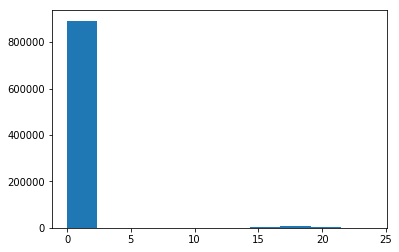

In [47]:
plt.hist(np.log1p(data1['transactionRevenue']));

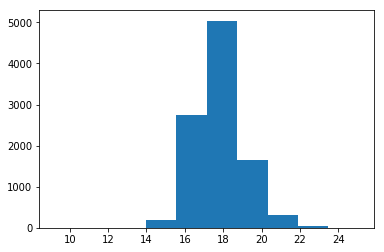

In [48]:
grouped1 = data1.groupby('fullVisitorId')['transactionRevenue'].sum().reset_index()
#grouped1 = grouped.loc[grouped['totals.transactionRevenue'].isna() == False]
plt.hist(np.log(grouped1.loc[grouped1['transactionRevenue'] > 0, 'transactionRevenue']));

In [130]:
#data1['campaign']
data1=data1.drop(['campaign'],axis=1)

In [131]:
#dropping irrelevant columns
data1=data1.drop(['adContent'],axis=1)
data1=data1.drop(['adwordsClickInfo.adNetworkType'],axis=1)
data1=data1.drop(['referralPath'],axis=1)

In [132]:
#replacing nan with zero
data1['hits'].fillna(0,inplace=True)
data1['pageviews'].fillna(0,inplace=True)
data1['bounces'].fillna(0,inplace=True)
data1['newVisits'].fillna(0,inplace=True)
data1['visits'].fillna(0,inplace=True)


In [133]:
#converting to numeric
data1.hits = pd.to_numeric(data1.hits, errors='coerce')
data1.pageviews = pd.to_numeric(data1.pageviews, errors='coerce')
data1.bounces = pd.to_numeric(data1.bounces, errors='coerce')
data1.visits = pd.to_numeric(data1.visits, errors='coerce')
data1.newVisits = pd.to_numeric(data1.newVisits, errors='coerce')

In [134]:
data1['transactionRevenue_log'] = (np.log(data1[data1["transactionRevenue"] > 0]["transactionRevenue"]))
data1['transactionRevenue_log'].fillna(0,inplace=True)

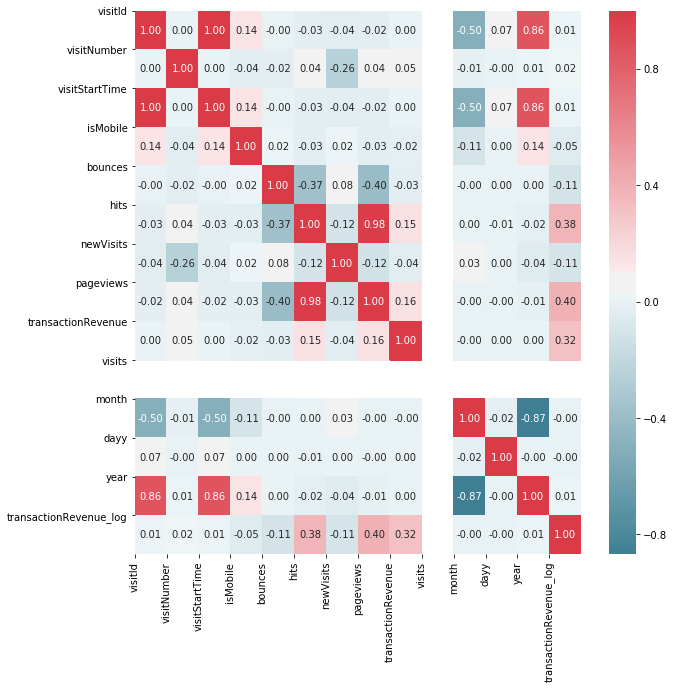

In [56]:
corr = data1.corr()
    #Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map, red & blue
colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

In [57]:
test_data=pd.read_csv('C:/Users/Srishti/Desktop/dsf/assignment3/all/test.csv',dtype={'fullVisitorId': 'str'})


In [58]:
test_data.shape

(804684, 12)

In [59]:
test_data.dtypes

channelGrouping         object
date                     int64
device                  object
fullVisitorId           object
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

In [60]:
device_json_test=[]
for i in test_data['device']:
    device_json_test.append(json.loads(i))
device_json_test=json_normalize(device_json_test)

In [61]:
geoNetwork_json_test=[]
for i in test_data['geoNetwork']:
    geoNetwork_json_test.append(json.loads(i))
geoNetwork_json_test=json_normalize(geoNetwork_json_test)

In [62]:
trafficSource_json_test=[]
for i in test_data['trafficSource']:
    trafficSource_json_test.append(json.loads(i))
trafficSource_json_test=json_normalize(trafficSource_json_test)

In [63]:
totals_json_test=[]
for i in test_data['totals']:
    totals_json_test.append(json.loads(i))
totals_json_test=json_normalize(totals_json_test)

In [64]:
final_device_test=pd.DataFrame(device_json_test)
final_geo_test=pd.DataFrame(geoNetwork_json_test)
final_traffic_test=pd.DataFrame(trafficSource_json_test)
final_totals_test=pd.DataFrame(totals_json_test)

In [65]:
test_data=pd.concat([test_data,final_device_test,final_geo_test,final_totals_test,final_traffic_test],axis=1)

In [66]:
test_data=test_data.drop(['device','geoNetwork','trafficSource','totals'],axis=1)

In [67]:
null_count1=((test_data[test_data.columns] == 'not available in demo dataset') | (test_data[test_data.columns].isna())).sum()
df_size1=len(test_data)
keys1 = null_count1.keys()
null_col_test = [col for col in keys1 if null_count1[str(col)] > 0 if null_count1[str(col)] == df_size1]
test_data.drop(null_col_test, axis=1, inplace=True) 
test_data.drop(['adwordsClickInfo.gclId'],axis=1,inplace=True)

In [68]:
#test_data.drop(columns=['campaignCode'], inplace=True)
test_data.drop(columns=['socialEngagementType'], inplace=True)

In [69]:
test_data['date'] = pd.to_datetime(test_data['date'],format='%Y%m%d')

In [70]:
#test_data['visitStartTime']=pd.to_datetime(test_data['visitStartTime'],unit='s')
#test_data['visitStartTime'] = [d.time() for d in test_data['visitStartTime']]

In [71]:
test_data['month'] = test_data['date'].apply(lambda x: x.month)
test_data['dayy'] = test_data['date'].apply(lambda x: x.day)
test_data['year'] = test_data['date'].apply(lambda x: x.year)

In [72]:
test_data=test_data.drop(['campaign'],axis=1)
test_data=test_data.drop(['adContent'],axis=1)
test_data=test_data.drop(['adwordsClickInfo.adNetworkType'],axis=1)
test_data=test_data.drop(['referralPath'],axis=1)
test_data['hits'].fillna(0,inplace=True)
test_data['pageviews'].fillna(0,inplace=True)
test_data['bounces'].fillna(0,inplace=True)
test_data['newVisits'].fillna(0,inplace=True)
test_data['visits'].fillna(0,inplace=True)
test_data.hits = pd.to_numeric(test_data.hits, errors='coerce')
test_data.pageviews = pd.to_numeric(test_data.pageviews, errors='coerce')
test_data.bounces = pd.to_numeric(test_data.bounces, errors='coerce')
test_data.visits = pd.to_numeric(test_data.visits, errors='coerce')
test_data.newVisits = pd.to_numeric(test_data.newVisits, errors='coerce')


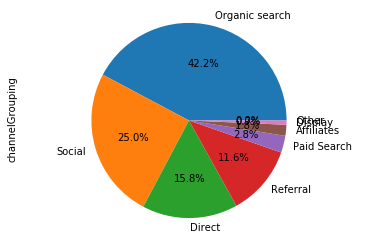

In [77]:
data_pie2 = data1['channelGrouping'].value_counts()
labels= 'Organic search', 'Social', 'Direct', 'Referral', 'Paid Search', 'Affiliates', 'Display','Other'
data_pie2.plot(kind='pie',labels=labels,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

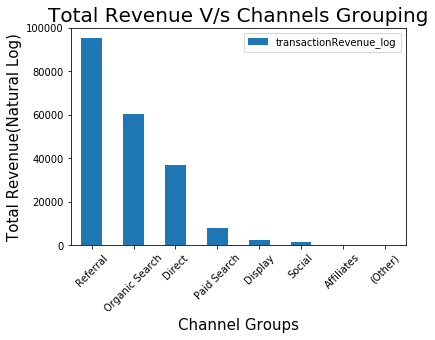

In [78]:
ax = (data1[data1['transactionRevenue_log']>0].groupby(['channelGrouping'])[['transactionRevenue_log']].sum().sort_values(by='transactionRevenue_log',ascending=False)).plot.bar()
ax.set_title("Total Revenue V/s Channels Grouping",fontsize=20)
ax.set_xlabel("Channel Groups",fontsize=15)
ax.set_ylabel('Total Revenue(Natural Log)',fontsize=15)
plt.xticks(rotation=45)
plt.show()

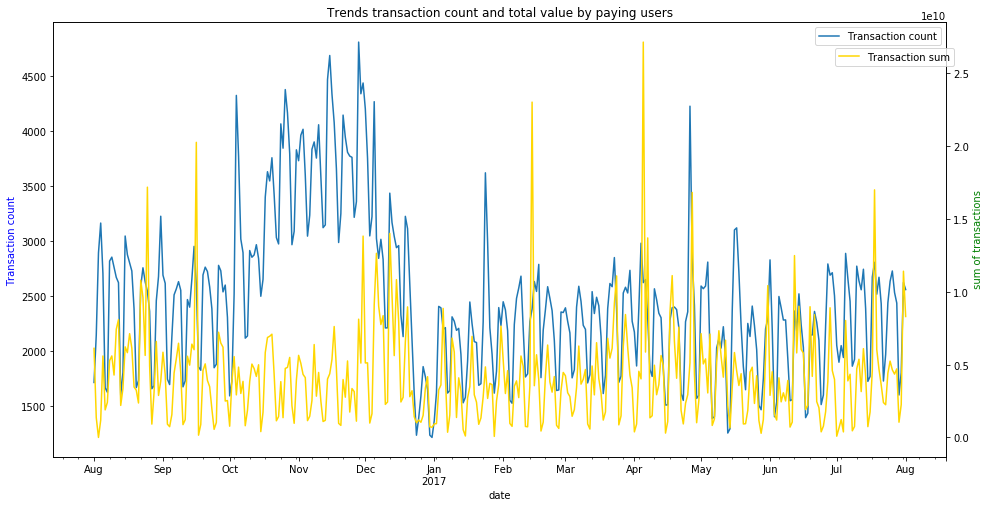

In [79]:
#data2['transactionRevenue'] = np.log1p(data2['transactionRevenue'])
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("Trends transaction count and total value by paying users")
data1.groupby(['date'])['transactionRevenue'].count().plot()
ax1.set_ylabel('Transaction count', color='b')
plt.legend(['Transaction count'])
ax2 = ax1.twinx()
data1.groupby(['date'])['transactionRevenue'].sum().plot(color='gold')
ax2.set_ylabel(' sum of transactions', color='g')
plt.legend(['Transaction sum'], loc=(0.875, 0.9))
plt.grid(False)

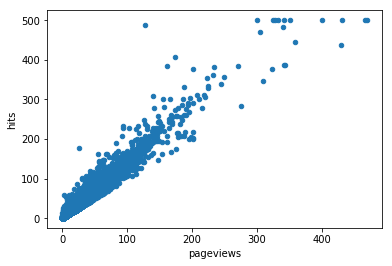

In [80]:
data1.plot.scatter('pageviews','hits')

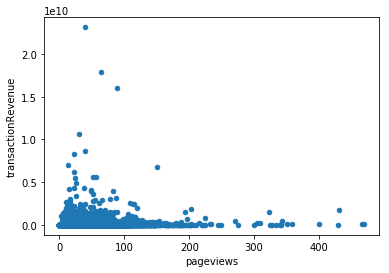

In [81]:
data1.plot.scatter('pageviews','transactionRevenue')

Description of SubContinent count: 
Northern America    390657
Southeast Asia       77800
Southern Asia        59321
Western Europe       59114
Northern Europe      58168
Eastern Asia         46919
Eastern Europe       45249
South America        41731
Name: subContinent, dtype: int64


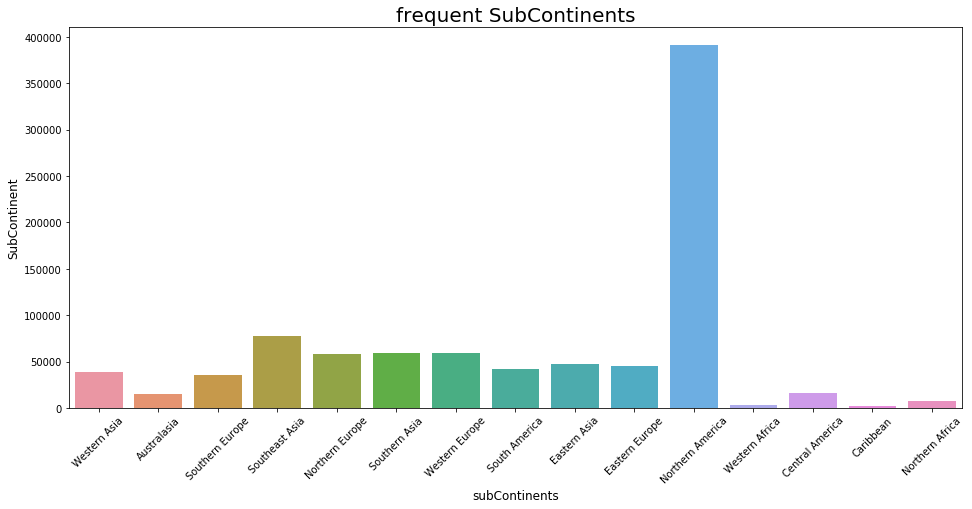

In [82]:
print("Description of SubContinent count: ")
print(data1['subContinent'].value_counts()[:8]) 
plt.figure(figsize=(16,7))
sns.countplot(data1[data1['subContinent']\
                       .isin(data1['subContinent']\
                             .value_counts()[:15].index.values)]['subContinent'])
plt.title("frequent SubContinents", fontsize=20)
plt.xlabel("subContinents", fontsize=12)
plt.ylabel("SubContinent", fontsize=12)
plt.xticks(rotation=45) 

plt.show() 

In [83]:
print("Top revenue generator countries")
((data1[data1['transactionRevenue_log'] > 0].groupby(['subContinent'])[['transactionRevenue_log']].sum()).sort_values(by='transactionRevenue_log',ascending=False)[:10])

Top revenue generator countries


,transactionRevenue_log
subContinent,
Northern America,198530.768656
South America,1797.699603
Eastern Asia,1065.426948
Southeast Asia,584.010994
Western Europe,536.235048
Northern Europe,471.385561
Central America,461.008275
Western Asia,374.353484
Caribbean,282.023106


Description of countries count: 
United States     364744
India              51140
United Kingdom     37393
Canada             25869
Vietnam            24598
Turkey             20522
Thailand           20123
Germany            19980
Name: country, dtype: int64


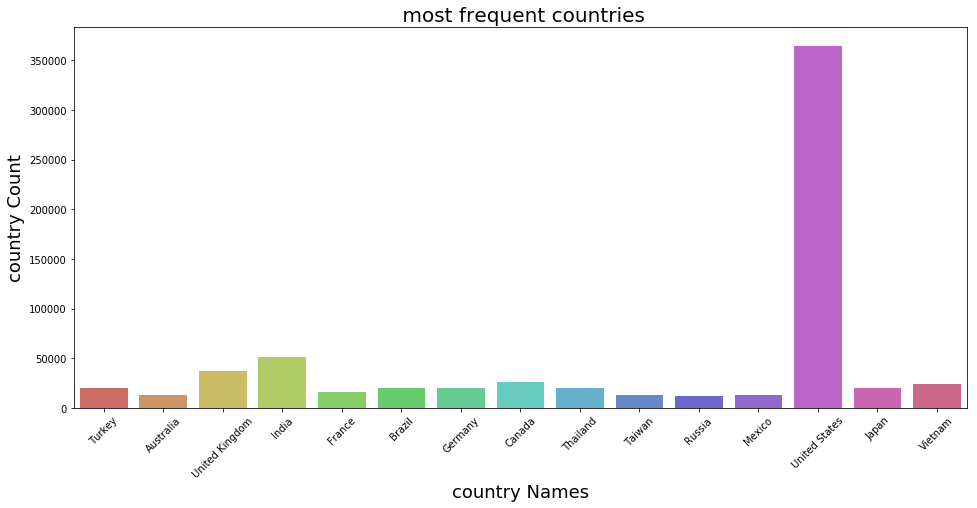

In [84]:
print("Description of countries count: ")
print(data1['country'].value_counts()[:8]) # printing the top 7 percentage of browsers

# seting the graph size
plt.figure(figsize=(16,7))

# let explore the browser used by users
sns.countplot(data1[data1['country']\
                       .isin(data1['country']\
                             .value_counts()[:15].index.values)]['country'], palette="hls")
plt.title(" most frequent countries", fontsize=20) 
plt.xlabel("country Names", fontsize=18) 
plt.ylabel("country Count", fontsize=18) 
plt.xticks(rotation=45) 
plt.show() 

In [85]:
print("Top revenue generator countries")
((data1[data1['transactionRevenue_log'] > 0].groupby(['country'])[['transactionRevenue_log']].sum()).sort_values(by='transactionRevenue_log',ascending=False)[:10])

Top revenue generator countries


,transactionRevenue_log
country,
United States,195140.705124
Canada,3390.063532
Venezuela,1180.855708
Mexico,355.864798
Taiwan,341.449980
Japan,309.927069
United Kingdom,285.855482
Australia,235.782776
Indonesia,205.743636


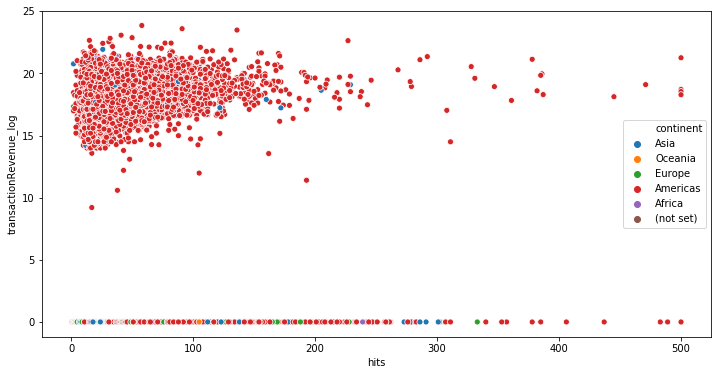

In [87]:
import seaborn as sns
plt.figure(figsize=(12,6))
tmp = data1[['transactionRevenue_log', 'hits','continent']].copy()
ax = sns.scatterplot(x='hits', y='transactionRevenue_log', hue='continent', data=tmp)

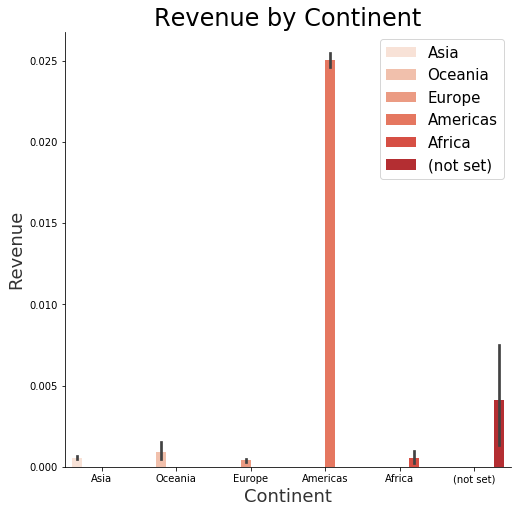

In [96]:
plt.figure(figsize=(8,8));
ax = sns.barplot(data=data1, \
                x='continent', \
                y='transactionRevenue', \
                hue='continent', \
                palette=sns.color_palette("Reds", n_colors=7, desat=1))

ax.set_xlabel("Continent", fontsize=18, alpha=0.8)
ax.set_ylabel("Revenue", fontsize=18, alpha=0.8)
ax.set_title("Revenue by Continent", fontsize=24)
ax.legend(fontsize=15)
sns.despine()
plt.show()

In [88]:
#grouped = data1.groupby('fullVisitorId')
#grouped=pd.DataFrame(grouped)

In [142]:
x=data1.drop(['transactionRevenue'],axis=1)
x=x.drop(['transactionRevenue_log'],axis=1)
x=x.drop(['adwordsClickInfo.page'],axis=1)
x=x.drop(['adwordsClickInfo.slot'],axis=1)
x=x.drop(['keyword'],axis=1)
x=x.apply(preprocessing.LabelEncoder().fit_transform)
y=data1['transactionRevenue'].copy()
y.loc[y==0]=0
y.loc[y>0]=1
lr=LogisticRegression()
lr.fit(x,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [143]:
predict_probs=lr.predict_proba(x)


In [144]:
top=predict_probs[:,1].argsort()[::-1][:10]
print(top)

[597465 468557 737936 403312 499188 600775 619405 456142  64060  81169]


In [148]:
#printing top 10 most likely buyers
for i in top:
    print(data1.iloc[i]['fullVisitorId'])

3560900121641699481
2195063960372896546
2001696391343143037
2706961341001088633
0092531753747954140
5526675926038480325
5531986444834608429
3924372865099736100
1124739547028739470
0672623205835845653


In [101]:
#calculating the count of transaction revenue for each user
data1.loc[data1['transactionRevenue'] > 0, 'fullVisitorId'].value_counts()

7813149961404844386    33
4984366501121503466    16
1957458976293878100    16
2402527199731150932    15
6760732402251466726    15
0608915197735218105    13
7311242886083854158    12
9089132392240687728    10
8197879643797712877    10
9029794295932939024     9
9377429831454005466     9
7463172420271311409     9
8436426603099391262     8
4835082938415020542     8
4578640586284138624     8
2411322974724385937     7
1814166460229302850     7
6010250598436085923     7
4808974885561715322     7
372706149688864468      7
9807072102349488174     7
1956307607572137989     7
1639589047263376521     7
3857043812510146001     6
3287424336851494398     6
5590743844926892757     6
1285137808569536764     6
8657427332734176422     6
0777922178356486144     6
3921649958751416379     6
                       ..
9767254351346198956     1
3222681460709008330     1
0185467632009737931     1
8040137666683755877     1
9858678631293882543     1
3563510904717248245     1
0422682096572302497     1
666892977881

In [136]:
#ptest
from sklearn.utils import shuffle
import random
def perm_test (x,y):
    m=10000
    b=0
    true_corr=np.corrcoef(x,y)[0][1]
    print (true_corr)
    for j in range(m):
        rs=random.randint(1, 1000)
        y_shuf = shuffle(y, random_state=rs)
        shuf_corr=np.corrcoef(x,y_shuf)[0][1]
        if (true_corr > 0):
            if (shuf_corr > true_corr):
                b=b+1
        else :
            if (shuf_corr < true_corr):
                b=b+1
    print(b)
    return (b+1)/(m+1)


In [141]:
print (perm_test(data1['pageviews'], data1['transactionRevenue']))
print (perm_test(data1['bounces'], data1['transactionRevenue']))

0.1555893945457186
0
9.999000099990002e-05


In [ ]:
#training model for prediction. Used lightgbm.
def get_folds(df=None, n_splits=5):
    """Returns dataframe indices corresponding to Visitors Group KFold"""
    # Get sorted unique visitors
    unique_vis = np.array(sorted(df['fullVisitorId'].unique()))

    # Get folds
    folds = GroupKFold(n_splits=n_splits)
    fold_ids = []
    ids = np.arange(df.shape[0])
    for trn_vis, val_vis in folds.split(X=unique_vis, y=unique_vis, groups=unique_vis):
        fold_ids.append(
            [
                ids[df['fullVisitorId'].isin(unique_vis[trn_vis])],
                ids[df['fullVisitorId'].isin(unique_vis[val_vis])]
            ]
        )

    return fold_ids
train=data1.drop(['transactionRevenue'],axis=1)
train=train.drop(['transactionRevenue_log'],axis=1)
y_reg = data1['transactionRevenue'].fillna(0)
#del train['totals.transactionRevenue']

if 'transactionRevenue' in test_data.columns:
    del test_data['totals.transactionRevenue']
for df in [train, test_data]:
    df['date'] = pd.to_datetime(df['visitStartTime'], unit='s')
    df['sess_date_dow'] = df['date'].dt.dayofweek
    df['sess_date_hours'] = df['date'].dt.hour
    df['sess_date_dom'] = df['date'].dt.day
excluded_features = [
    'date', 'fullVisitorId', 'sessionId', 'transactionRevenue', 
    'visitId', 'visitStartTime','dayy','year','month','transactionRevenue_log'
]

categorical_features = [
    _f for _f in train.columns
    if (_f not in excluded_features) & (train[_f].dtype == 'object')
]
for f in categorical_features:
    train[f], indexer = pd.factorize(train[f])
    test_data[f] = indexer.get_indexer(test_data[f])
folds = get_folds(df=train, n_splits=5)

train_features = [_f for _f in train.columns if _f not in excluded_features]
print(train_features)

importances = pd.DataFrame()
oof_reg_preds = np.zeros(train.shape[0])
sub_reg_preds = np.zeros(test_data.shape[0])
for fold_, (trn_, val_) in enumerate(folds):
    trn_x, trn_y = train[train_features].iloc[trn_], y_reg.iloc[trn_]
    val_x, val_y = train[train_features].iloc[val_], y_reg.iloc[val_]
    
    reg = lgb.LGBMRegressor(
        num_leaves=31,
        learning_rate=0.03,
        n_estimators=1000,
        subsample=.9,
        colsample_bytree=.9,
        random_state=1
    )
    reg.fit(
        trn_x, np.log1p(trn_y),
        eval_set=[(val_x, np.log1p(val_y))],
        early_stopping_rounds=50,
        verbose=100,
        eval_metric='rmse'
    )
    imp_df = pd.DataFrame()
    imp_df['feature'] = train_features
    imp_df['gain'] = reg.booster_.feature_importance(importance_type='gain')
    
    imp_df['fold'] = fold_ + 1
    importances = pd.concat([importances, imp_df], axis=0, sort=False)
    
    oof_reg_preds[val_] = reg.predict(val_x, num_iteration=reg.best_iteration_)
    oof_reg_preds[oof_reg_preds < 0] = 0
    _preds = reg.predict(test_data[train_features], num_iteration=reg.best_iteration_)
    _preds[_preds < 0] = 0
    sub_reg_preds += np.expm1(_preds) / len(folds)
    
mean_squared_error(np.log1p(y_reg), oof_reg_preds) ** .5
train['predictions'] = np.expm1(oof_reg_preds)
test_data['predictions'] = sub_reg_preds
trn_data = train[train_features + ['fullVisitorId']].groupby('fullVisitorId').mean()

# Create a list of predictions for each Visitor
trn_pred_list = train[['fullVisitorId', 'predictions']].groupby('fullVisitorId')\
    .apply(lambda df: list(df.predictions))\
    .apply(lambda x: {'pred_'+str(i): pred for i, pred in enumerate(x)})
trn_all_predictions = pd.DataFrame(list(trn_pred_list.values), index=trn_data.index)
trn_feats = trn_all_predictions.columns
trn_all_predictions['t_mean'] = np.log1p(trn_all_predictions[trn_feats].mean(axis=1))
trn_all_predictions['t_median'] = np.log1p(trn_all_predictions[trn_feats].median(axis=1))
trn_all_predictions['t_sum_log'] = np.log1p(trn_all_predictions[trn_feats]).sum(axis=1)
trn_all_predictions['t_sum_act'] = np.log1p(trn_all_predictions[trn_feats].fillna(0).sum(axis=1))
trn_all_predictions['t_nb_sess'] = trn_all_predictions[trn_feats].isnull().sum(axis=1)
full_data = pd.concat([trn_data, trn_all_predictions], axis=1)
del trn_data, trn_all_predictions
gc.collect()
full_data.shape

sub_pred_list = test_data[['fullVisitorId', 'predictions']].groupby('fullVisitorId')\
    .apply(lambda df: list(df.predictions))\
    .apply(lambda x: {'pred_'+str(i): pred for i, pred in enumerate(x)})
sub_data = test_data[train_features + ['fullVisitorId']].groupby('fullVisitorId').mean()
sub_all_predictions = pd.DataFrame(list(sub_pred_list.values), index=sub_data.index)
for f in trn_feats:
    if f not in sub_all_predictions.columns:
        sub_all_predictions[f] = np.nan
sub_all_predictions['t_mean'] = np.log1p(sub_all_predictions[trn_feats].mean(axis=1))
sub_all_predictions['t_median'] = np.log1p(sub_all_predictions[trn_feats].median(axis=1))
sub_all_predictions['t_sum_log'] = np.log1p(sub_all_predictions[trn_feats]).sum(axis=1)
sub_all_predictions['t_sum_act'] = np.log1p(sub_all_predictions[trn_feats].fillna(0).sum(axis=1))
sub_all_predictions['t_nb_sess'] = sub_all_predictions[trn_feats].isnull().sum(axis=1)
sub_full_data = pd.concat([sub_data, sub_all_predictions], axis=1)
del sub_data, sub_all_predictions
gc.collect()
sub_full_data.shape
train['target'] = y_reg
trn_user_target = train[['fullVisitorId', 'target']].groupby('fullVisitorId').sum()
folds = get_folds(df=full_data[['pageviews']].reset_index(), n_splits=5)

oof_preds = np.zeros(full_data.shape[0])
sub_preds = np.zeros(sub_full_data.shape[0])
vis_importances = pd.DataFrame()

for fold_, (trn_, val_) in enumerate(folds):
    trn_x, trn_y = full_data.iloc[trn_], trn_user_target['target'].iloc[trn_]
    val_x, val_y = full_data.iloc[val_], trn_user_target['target'].iloc[val_]
    
    reg = lgb.LGBMRegressor(
        num_leaves=31,
        learning_rate=0.05,
        n_estimators=1000,
        subsample=.9,
        colsample_bytree=.9,
        random_state=1
    )
    reg.fit(
        trn_x, np.log1p(trn_y),
        eval_set=[(trn_x, np.log1p(trn_y)), (val_x, np.log1p(val_y))],
        eval_names=['TRAIN', 'VALID'],
        early_stopping_rounds=50,
        eval_metric='rmse',
        verbose=100
    )
    
    imp_df = pd.DataFrame()
    imp_df['feature'] = trn_x.columns
    imp_df['gain'] = reg.booster_.feature_importance(importance_type='gain')
    
    imp_df['fold'] = fold_ + 1
    vis_importances = pd.concat([vis_importances, imp_df], axis=0, sort=False)
    
    oof_preds[val_] = reg.predict(val_x, num_iteration=reg.best_iteration_)
    oof_preds[oof_preds < 0] = 0
    
    # Make sure features are in the same order
    _preds = reg.predict(sub_full_data[full_data.columns], num_iteration=reg.best_iteration_)
    _preds[_preds < 0] = 0
    sub_preds += _preds / len(folds)
    
mean_squared_error(np.log1p(trn_user_target['target']), oof_preds) ** .5
sub_full_data['PredictedLogRevenue'] = sub_preds
sub_full_data[['PredictedLogRevenue']].to_csv('C:/Users/Srishti/Desktop/dsf/assignment3/all/submission1.csv', index=True)

['channelGrouping', 'visitNumber', 'browser', 'deviceCategory', 'isMobile', 'operatingSystem', 'city', 'continent', 'country', 'metro', 'networkDomain', 'region', 'subContinent', 'bounces', 'hits', 'newVisits', 'pageviews', 'visits', 'adwordsClickInfo.isVideoAd', 'adwordsClickInfo.page', 'adwordsClickInfo.slot', 'isTrueDirect', 'keyword', 'medium', 'source', 'sess_date_dow', 'sess_date_hours', 'sess_date_dom']
Training until validation scores don't improve for 50 rounds.
[100]	valid_0's rmse: 1.66024	valid_0's l2: 2.75639
[200]	valid_0's rmse: 1.64651	valid_0's l2: 2.711
[300]	valid_0's rmse: 1.64284	valid_0's l2: 2.69894
[400]	valid_0's rmse: 1.64058	valid_0's l2: 2.6915
[500]	valid_0's rmse: 1.63957	valid_0's l2: 2.6882
Early stopping, best iteration is:
[494]	valid_0's rmse: 1.63942	valid_0's l2: 2.6877
Training until validation scores don't improve for 50 rounds.
[100]	valid_0's rmse: 1.64045	valid_0's l2: 2.69107
[200]	valid_0's rmse: 1.62879	valid_0's l2: 2.65295
[300]	valid_0's 